 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df=pd.read_csv(whale_returns_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isna().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df=pd.read_csv(algo_returns_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
daily_returns_df=pd.read_csv(sp500_history_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
daily_returns_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
daily_returns_df.dtypes



Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
daily_returns_df['Close'] = daily_returns_df['Close'].str.replace('$', '')
daily_returns_df['Close'] = daily_returns_df['Close'].astype(float)
daily_returns_df.head()


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns_df = daily_returns_df.pct_change()
daily_returns_df.head()



,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
daily_returns_df.dropna(inplace=True)


In [13]:
# Rename Column
# YOUR CODE HERE
daily_returns_df = daily_returns_df.rename(columns={"Close" : "Daily Return"})
daily_returns_df.head()



,Daily Return
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, daily_returns_df], axis="columns", join="inner")
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

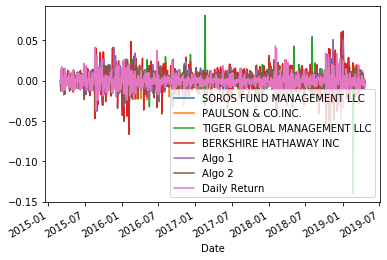

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot()

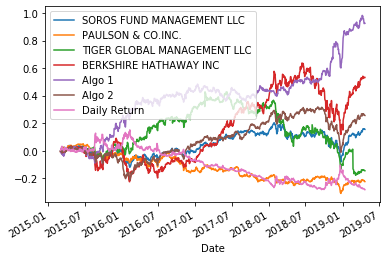

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()-1
cumulative_returns.plot()


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

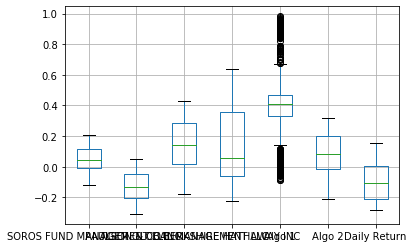

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
cumulative_returns.boxplot()

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
cumulative_returns.std().sort_values(ascending=True)


SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
Daily Return                   0.114846
Algo 2                         0.131642
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 1                         0.231772
BERKSHIRE HATHAWAY INC         0.241382
dtype: float64

# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
Algo 2, TIGER GLOBAL MANAGEMENT LLC, Algo 1, and BERKSHIRE HATHAWAY INC are riskier than the S&P 500 because they have a higher standard deviation, implying greater volatility. 

In [19]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std = cumulative_returns.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
Daily Return                   1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

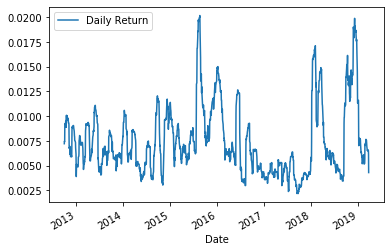

In [20]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
std_ma = daily_returns_df.rolling(window=21).std()
std_ma.plot()


In [21]:
# Correlation
# YOUR CODE HERE
price_correlation = combined_df.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Daily Return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [22]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_df['Algo 1'].cov(combined_df['Daily Return'])
variance = combined_df['Algo 1'].var()
beta = covariance/variance
beta



-0.03825878394465824

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [23]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [24]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)


Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
Daily Return                  -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

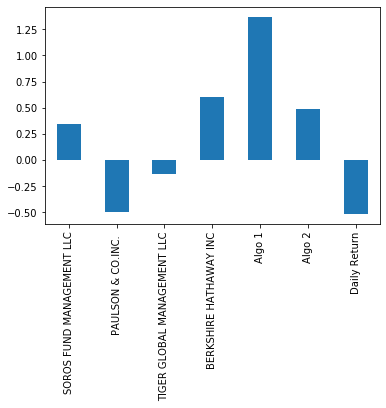

In [25]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar')


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Read the first stock
# YOUR CODE HERE
crm_csv = Path("CRM.csv")
crm_df=pd.read_csv(crm_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
crm_df.head()



,Close
Date,
2019-04-22,158.759995
2019-04-23,161.229996
2019-04-24,159.559998
2019-04-25,163.089996
2019-04-26,165.960007


In [27]:
# Read the second stock
# YOUR CODE HERE
FB_csv = Path("FB.csv")
FB_df=pd.read_csv(FB_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
FB_df.head()

,Close
Date,
2019-04-22,181.440002
2019-04-23,183.779999
2019-04-24,182.580002
2019-04-25,193.259995
2019-04-26,191.490005


In [28]:
# Read the third stock
# YOUR CODE HERE
JNJ_csv = Path("JNJ.csv")
JNJ_df=pd.read_csv(JNJ_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
JNJ_df.head()

,Close
Date,
2019-04-22,137.830002
2019-04-23,139.899994
2019-04-24,139.199997
2019-04-25,139.649994
2019-04-26,140.389999


In [29]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_port_df = pd.concat([crm_df, FB_df, JNJ_df], axis="columns", join="inner")
my_port_df

,Close,Close,Close
Date,,,
2019-04-22,158.759995,181.440002,137.830002
2019-04-23,161.229996,183.779999,139.899994
2019-04-24,159.559998,182.580002,139.199997
2019-04-25,163.089996,193.259995,139.649994
2019-04-26,165.960007,191.490005,140.389999
...,...,...,...
2020-04-13,152.500000,174.789993,139.770004
2020-04-14,157.710007,178.169998,146.029999
2020-04-15,155.630005,176.970001,147.660004


In [30]:
# Reset the index
# YOUR CODE HERE
my_port_df.columns = ["CRM", "FB", "JNJ"]
my_port_df.sort_index()
my_port_df.head()



,CRM,FB,JNJ
Date,,,
2019-04-22,158.759995,181.440002,137.830002
2019-04-23,161.229996,183.779999,139.899994
2019-04-24,159.559998,182.580002,139.199997
2019-04-25,163.089996,193.259995,139.649994
2019-04-26,165.960007,191.490005,140.389999


In [31]:
# Drop Nulls
# YOUR CODE HERE
my_port_df.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Calculate daily returns
my_port_daily_returns = my_port_df.pct_change()
my_port_daily_returns.dropna(inplace=True)
my_port_daily_returns

,CRM,FB,JNJ
Date,,,
2019-04-23,0.015558,0.012897,0.015018
2019-04-24,-0.010358,-0.006530,-0.005004
2019-04-25,0.022123,0.058495,0.003233
2019-04-26,0.017598,-0.009159,0.005299
2019-04-29,-0.003615,0.017181,-0.003918
...,...,...,...
2020-04-13,-0.013264,-0.002283,-0.010338
2020-04-14,0.034164,0.019338,0.044788
2020-04-15,-0.013189,-0.006735,0.011162


In [33]:
fixed_port = my_port_daily_returns.copy()
fixed_port.index = my_port_daily_returns.index.to_series().dt.date
fixed_port

,CRM,FB,JNJ
Date,,,
2019-04-23,0.015558,0.012897,0.015018
2019-04-24,-0.010358,-0.006530,-0.005004
2019-04-25,0.022123,0.058495,0.003233
2019-04-26,0.017598,-0.009159,0.005299
2019-04-29,-0.003615,0.017181,-0.003918
...,...,...,...
2020-04-13,-0.013264,-0.002283,-0.010338
2020-04-14,0.034164,0.019338,0.044788
2020-04-15,-0.013189,-0.006735,0.011162


In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = fixed_port.dot(weights)
fixed_port

,CRM,FB,JNJ
Date,,,
2019-04-23,0.015558,0.012897,0.015018
2019-04-24,-0.010358,-0.006530,-0.005004
2019-04-25,0.022123,0.058495,0.003233
2019-04-26,0.017598,-0.009159,0.005299
2019-04-29,-0.003615,0.017181,-0.003918
...,...,...,...
2020-04-13,-0.013264,-0.002283,-0.010338
2020-04-14,0.034164,0.019338,0.044788
2020-04-15,-0.013189,-0.006735,0.011162


In [35]:
fixed_port['My Portfolio'] = weighted_returns
fixed_port

,CRM,FB,JNJ,My Portfolio
Date,,,,
2019-04-23,0.015558,0.012897,0.015018,0.014491
2019-04-24,-0.010358,-0.006530,-0.005004,-0.007297
2019-04-25,0.022123,0.058495,0.003233,0.027950
2019-04-26,0.017598,-0.009159,0.005299,0.004579
2019-04-29,-0.003615,0.017181,-0.003918,0.003216
...,...,...,...,...
2020-04-13,-0.013264,-0.002283,-0.010338,-0.008628
2020-04-14,0.034164,0.019338,0.044788,0.032763
2020-04-15,-0.013189,-0.006735,0.011162,-0.002921


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# YOUR CODE HERE
total_df = pd.concat([combined_df, fixed_port])
total_df.sample(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return,CRM,FB,JNJ,My Portfolio
Date,,,,,,,,,,,
2017-09-12 00:00:00,0.003137,0.002378,-0.001263,0.008287,0.005816,0.004597,-0.000756,NaN,NaN,NaN,NaN
2017-09-22 00:00:00,0.000185,0.001371,-0.013759,-0.002418,0.001891,0.003586,0.002227,NaN,NaN,NaN,NaN
2018-04-17 00:00:00,0.006933,0.004547,0.005965,0.019044,0.004401,0.007295,-0.000831,NaN,NaN,NaN,NaN
2019-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001242,0.009988,0.001004,0.00325
2016-01-25 00:00:00,-0.016317,-0.006365,-0.008262,-0.019433,-0.009831,-0.014276,-0.013947,NaN,NaN,NaN,NaN
2017-09-18 00:00:00,-0.000671,-0.003060,0.000295,0.006785,-0.002924,0.007545,-0.001109,NaN,NaN,NaN,NaN
2019-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018484,-0.013202,-0.000833,-0.01084
2016-03-22 00:00:00,-0.004526,0.005904,-0.001920,-0.003169,0.001174,-0.001873,0.006427,NaN,NaN,NaN,NaN
2016-07-27 00:00:00,-0.001219,0.009840,-0.013689,-0.000058,0.001840,0.001630,-0.001604,NaN,NaN,NaN,NaN


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
total_df.dropna()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Return,CRM,FB,JNJ,My Portfolio
Date,,,,,,,,,,,


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

In [39]:
# Rolling
# YOUR CODE HERE

In [40]:
# Beta
# YOUR CODE HERE

In [41]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [42]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [43]:
# YOUR CODE HERE